In [1]:
%cd masalytics

C:\Users\khanh\Summer_Internship_Correct\masalytics


In [5]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 52EE-02DC

 Directory of C:\Users\khanh\Summer_Internship_Correct\masalytics

20/11/2025  11:18 AM    <DIR>          .
20/11/2025  11:25 AM    <DIR>          ..
20/11/2025  11:18 AM             4,895 .gitignore
20/11/2025  11:18 AM    <DIR>          data
20/11/2025  11:18 AM             3,372 README.md
               2 File(s)          8,267 bytes
               3 Dir(s)  109,111,894,016 bytes free


In [150]:
import sqlite3
import pandas as pd
import json
import datetime
from tqdm import tqdm

In [152]:
conn = sqlite3.connect('data/numero_data.sqlite')
cursor = conn.cursor()

In [154]:
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
df

,name
0,film_metadata
1,indian_titles
2,sales_raw_data


In [156]:
tables = ['film_metadata', 'sales_raw_data', 'indian_titles']
tables

['film_metadata', 'sales_raw_data', 'indian_titles']

In [158]:
for table in tables:
    print(f"\n{table} columns:")
    column_info = pd.read_sql(f"PRAGMA table_info({table});", conn)
    display(column_info)
    print(f"\nTotal rows:")
    total_count = pd.read_sql(f"SELECT COUNT(*) as total_rows FROM {table};", conn)
    print(total_count.iloc[0, 0])


film_metadata columns:


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,title,TEXT,0,None,0



Total rows:
100

sales_raw_data columns:


,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,raw_json,TEXT,0,None,0



Total rows:
100

indian_titles columns:


,cid,name,type,notnull,dflt_value,pk
0,0,rank,INTEGER,0,None,0
1,1,title,TEXT,0,None,0
2,2,distributor,TEXT,0,None,0
3,3,release_date,TEXT,0,None,0
4,4,rating,TEXT,0,None,0
5,5,opening_screens,REAL,0,None,0
6,6,opening_screen_average,REAL,0,None,0
7,7,opening_weekend_total,REAL,0,None,0
8,8,opening_week_total,REAL,0,None,0
9,9,lifetime_total,REAL,0,None,0



Total rows:
214


In [160]:
for table in tables:
    print(f"\n{table}:")
    df_first10rows = pd.read_sql(f"SELECT * FROM {table} LIMIT 10;", conn)
    display(df_first10rows)


film_metadata:


,numero_film_id,title
0,48137,Noah's Ark
1,63815,Narivetta
2,64826,The Diplomat
3,66112,Bazooka
4,68343,Emergency
5,68556,Guru Nanak Jahaz
6,71731,Dhadak 2
7,71733,Deva
8,73250,The Fall (2008) 4K RE: 2025
9,75788,Azaad



sales_raw_data:


,numero_film_id,raw_json
0,48137,"{""2025-02-20"": {""rows"": [{""boxOffice"": {""day1""..."
1,63815,"{""2025-05-22"": {""rows"": [{""boxOffice"": {""day1""..."
2,64826,"{""2025-03-13"": {""rows"": [{""boxOffice"": {""day1""..."
3,66112,"{""2025-04-10"": {""rows"": [{""boxOffice"": {""day1""..."
4,68343,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."
5,68556,"{""2025-05-01"": {""rows"": [{""boxOffice"": {""day1""..."
6,71731,"{""2025-07-31"": {""rows"": [{""boxOffice"": {""day1""..."
7,71733,"{""2025-01-30"": {""rows"": [{""boxOffice"": {""day1""..."
8,73250,"{""2025-02-27"": {""rows"": [{""boxOffice"": {""day1""..."
9,75788,"{""2025-01-16"": {""rows"": [{""boxOffice"": {""day1""..."



indian_titles:


,rank,title,distributor,release_date,rating,opening_screens,opening_screen_average,opening_weekend_total,opening_week_total,lifetime_total
0,1,Kantara A Legend: Chapter 1,Zstars Entertainment,2025-10-02,MA15+,100.0,9957.0,621261.59,995729.07,1821480.20
1,2,Saiyaara,Mindblowing,2025-07-18,M,59.0,6874.0,143460.28,405556.68,1763920.24
2,3,Chhaava,Mindblowing,2025-02-14,MA15+,93.0,7277.0,441056.77,676800.14,1675095.00
3,4,Coolie,Tolly Movies,2025-08-14,MA15+,141.0,9671.0,1271871.07,1363557.81,1446410.71
4,5,L2: Empuraan,Cyber Systems,2025-03-27,MA15+,142.0,9522.0,1233067.67,1352170.50,1404662.94
5,6,Sardaar Ji 3,White Hill,2025-06-26,M,64.0,9853.0,388558.35,630589.45,1212911.80
6,7,Chal Mera Putt 4,Forum Distribution,2025-08-01,PG,86.0,9420.0,553666.14,810094.47,1175117.56
7,8,Sitaare Zameen Par,Forum Distribution,2025-06-20,PG,104.0,6146.0,445848.54,639135.10,1105688.51
8,9,War 2,Mindblowing,2025-08-14,MA15+,148.0,5954.0,741943.09,881148.88,1052431.52
9,10,Lokah Chapter One: Chandra,Wanderlust Films,2025-08-28,MA15+,59.0,6765.0,230529.36,399160.69,956315.15


In [162]:
#Checking for MISSING VALUES

for tbl_name in tables:
    print(f"\n=== Missing Values in {tbl_name} ===")
    sample_data = pd.read_sql(f"SELECT * FROM {tbl_name};", conn)
    missing_info = sample_data.isnull().sum()
    missing_percentage = (missing_info / len(sample_data)) * 100
    
    # Create summary dataframe
    null_summary = pd.DataFrame({
        'column_name': missing_info.index,
        'null_count': missing_info.values,
        'null_percentage': missing_percentage.values
    })
    
    # Show only columns with missing values
    null_summary = null_summary[null_summary['null_count'] > 0]
    display(null_summary)


=== Missing Values in film_metadata ===


,column_name,null_count,null_percentage



=== Missing Values in sales_raw_data ===


,column_name,null_count,null_percentage



=== Missing Values in indian_titles ===


,column_name,null_count,null_percentage
4,rating,2,0.934579
5,opening_screens,4,1.869159
6,opening_screen_average,4,1.869159
7,opening_weekend_total,4,1.869159
8,opening_week_total,4,1.869159


In [164]:
#Explore Data Types and Unique Values

# Examine unique values in key columns
for current_table in tables:
    if current_table == 'indian_titles':
        # Check categorical columns
        for col in ['distributor', 'rating']:
            unique_query = f"SELECT {col}, COUNT(*) as frequency FROM {current_table} GROUP BY {col} ORDER BY frequency DESC LIMIT 15;"
            result_df = pd.read_sql(unique_query, conn)
            print(f"\nTop values in {col}:")
            display(result_df)


Top values in distributor:


,distributor,frequency
0,Tolly Movies,38
1,Forum Distribution,28
2,Cyber Systems,27
3,Mindblowing,26
4,Home Screen Entertainment,23
5,Zstars Entertainment,20
6,Zee Studios,14
7,Wanderlust Films,11
8,White Hill,6
9,Moviegoers Entertainment,6



Top values in rating:


,rating,frequency
0,M,70
1,MA15+,58
2,EX,48
3,PG,33
4,G,3
5,None,2


In [166]:
#Identify relationship between tables

print("=== Checking Table Relationships ===\n")
for idx, tbl in enumerate(tables):
    column_query = f"SELECT name FROM PRAGMA_TABLE_INFO('{tbl}');"
    cols = pd.read_sql(column_query, conn)
    print(f"{tbl} has columns: {', '.join(cols['name'].tolist())}")

# Check if numero_film_id exists in multiple tables
print("\n=== Checking numero_film_id distribution ===")
for table_item in tables:
    try:
        id_count = pd.read_sql(f"SELECT COUNT(DISTINCT numero_film_id) as unique_ids FROM {table_item};", conn)
        print(f"{table_item}: {id_count['unique_ids'][0]} unique film IDs")
    except:
        print(f"{table_item}: No numero_film_id column")

=== Checking Table Relationships ===

film_metadata has columns: numero_film_id, title
sales_raw_data has columns: numero_film_id, raw_json
indian_titles has columns: rank, title, distributor, release_date, rating, opening_screens, opening_screen_average, opening_weekend_total, opening_week_total, lifetime_total

=== Checking numero_film_id distribution ===
film_metadata: 100 unique film IDs
sales_raw_data: 100 unique film IDs
indian_titles: No numero_film_id column


In [168]:
#Statistical Summary
# Statistical summary for indian_titles
print("=== Statistical Summary: indian_titles ===\n")
numerical_data = pd.read_sql("SELECT * FROM indian_titles;", conn)

# Select only numeric columns
numeric_cols = numerical_data.select_dtypes(include=['float64', 'int64']).columns
stats_summary = numerical_data[numeric_cols].describe()
display(stats_summary.T)

=== Statistical Summary: indian_titles ===



,count,mean,std,min,25%,50%,75%,max
rank,214.0,107.500000,61.920648,1.0,54.2500,107.500,160.7500,214.00
opening_screens,210.0,30.376190,31.835498,1.0,5.0000,21.000,49.5000,148.00
opening_screen_average,210.0,2094.247619,2325.367873,19.0,516.7500,1214.500,2706.0000,12060.00
opening_weekend_total,210.0,80530.147048,169628.867935,37.0,2048.6000,12720.875,78322.9025,1271871.07
opening_week_total,210.0,106372.780810,210655.292470,37.0,2787.2525,16267.505,100941.2950,1363557.81
lifetime_total,214.0,149291.959439,314553.569727,10.0,2884.6725,18637.695,144653.3675,1821480.20


In [170]:
#Check date ranges
for table_id in tables:
    print(f"\nColumns in {table_id}:")
    info = pd.read_sql(f"PRAGMA table_info({table_id});", conn)
    display(info[['name']])


Columns in film_metadata:


,name
0,numero_film_id
1,title



Columns in sales_raw_data:


,name
0,numero_film_id
1,raw_json



Columns in indian_titles:


,name
0,rank
1,title
2,distributor
3,release_date
4,rating
5,opening_screens
6,opening_screen_average
7,opening_weekend_total
8,opening_week_total
9,lifetime_total


In [172]:
sample_row = pd.read_sql("SELECT raw_json FROM sales_raw_data LIMIT 1;", conn)
print(sample_row['raw_json'][0])

{"2025-02-20": {"rows": [{"boxOffice": {"day1": {"previousAdmissions": {}, "today": 9701}, "day2": {"previousAdmissions": {}, "today": 9952, "yesterday": 9701}, "day3": {"previousAdmissions": {}, "today": 63552, "yesterday": 9952}, "day4": {"previousAdmissions": {}, "today": 48450, "yesterday": 63552}, "day5": {"previousAdmissions": {}, "today": 2200, "yesterday": 48450}, "day6": {"previousAdmissions": {}, "today": 6149, "yesterday": 2200}, "day7": {"previousAdmissions": {}, "today": 6101, "yesterday": 6149}, "week": {"gross": 146105}, "weekend": {"gross": 131655}}, "circuit": "Event", "circuitId": 4, "city": "Parramatta & Ryde", "cityId": 246, "rank": 1, "region": "Sydney", "regionId": 26, "release": {"cumulativeBoxOffice": 146105, "cumulativePaidAdmissions": 89, "thisWeekFilmCount": 24, "thisWeekRank": 13}, "state": "New South Wales (inc ACT)", "stateId": 2, "theatre": "Macquarie 16", "theatreId": 225}, {"boxOffice": {"day1": {"previousAdmissions": {}, "today": 7198}, "day2": {"previ

In [174]:
# Get all rows
rows_df = pd.read_sql("SELECT raw_json FROM sales_raw_data;", conn)

# Extract sales_date from each raw_json
def extract_date(raw):
    try:
        data = json.loads(raw)
        return data.get("sales_date", None)  # Or whatever the key is called
    except:
        return None

rows_df['sales_date'] = rows_df['raw_json'].apply(extract_date)

# Check the range
print("Earliest date:", rows_df['sales_date'].min())
print("Latest date:", rows_df['sales_date'].max())
print("Total unique dates:", rows_df['sales_date'].nunique())

Earliest date: nan
Latest date: nan
Total unique dates: 0


In [176]:
# Print the first (or a few) raw_json entries to inspect structure
for i in range(3):  # See first 3 rows
    print(rows_df['raw_json'][i])

{"2025-02-20": {"rows": [{"boxOffice": {"day1": {"previousAdmissions": {}, "today": 9701}, "day2": {"previousAdmissions": {}, "today": 9952, "yesterday": 9701}, "day3": {"previousAdmissions": {}, "today": 63552, "yesterday": 9952}, "day4": {"previousAdmissions": {}, "today": 48450, "yesterday": 63552}, "day5": {"previousAdmissions": {}, "today": 2200, "yesterday": 48450}, "day6": {"previousAdmissions": {}, "today": 6149, "yesterday": 2200}, "day7": {"previousAdmissions": {}, "today": 6101, "yesterday": 6149}, "week": {"gross": 146105}, "weekend": {"gross": 131655}}, "circuit": "Event", "circuitId": 4, "city": "Parramatta & Ryde", "cityId": 246, "rank": 1, "region": "Sydney", "regionId": 26, "release": {"cumulativeBoxOffice": 146105, "cumulativePaidAdmissions": 89, "thisWeekFilmCount": 24, "thisWeekRank": 13}, "state": "New South Wales (inc ACT)", "stateId": 2, "theatre": "Macquarie 16", "theatreId": 225}, {"boxOffice": {"day1": {"previousAdmissions": {}, "today": 7198}, "day2": {"previ

In [178]:
def extract_date(raw):
    try:
        data = json.loads(raw)
        return data.get("actual_sales_date", None)  # substitute your field's exact name here
    except:
        return None

rows_df['actual_sales_date'] = rows_df['raw_json'].apply(extract_date)
print("Earliest date:", rows_df['actual_sales_date'].min())
print("Latest date:", rows_df['actual_sales_date'].max())
print("Total unique dates:", rows_df['actual_sales_date'].nunique())

Earliest date: nan
Latest date: nan
Total unique dates: 0


In [180]:
import re

sample_text = rows_df['raw_json'][0]  # first row text
dates_found = re.findall(r'\b\d{4}-\d{2}-\d{2}\b', sample_text)
print("Dates found:", dates_found)

Dates found: ['2025-02-20', '2025-02-27', '2025-03-06', '2025-03-13', '2025-03-20', '2025-03-27', '2025-04-03', '2025-04-10', '2025-04-17', '2025-04-24', '2025-05-01', '2025-05-08', '2025-05-15', '2025-05-22', '2025-05-29', '2025-06-05', '2025-06-12', '2025-06-19', '2025-06-26', '2025-07-03', '2025-07-10', '2025-07-17', '2025-07-24', '2025-07-31', '2025-08-07', '2025-08-14']


In [182]:
indian_titles_df = pd.read_sql("SELECT * FROM indian_titles LIMIT 10;", conn)
display(indian_titles_df[['title', 'release_date']])

,title,release_date
0,Kantara A Legend: Chapter 1,2025-10-02
1,Saiyaara,2025-07-18
2,Chhaava,2025-02-14
3,Coolie,2025-08-14
4,L2: Empuraan,2025-03-27
5,Sardaar Ji 3,2025-06-26
6,Chal Mera Putt 4,2025-08-01
7,Sitaare Zameen Par,2025-06-20
8,War 2,2025-08-14
9,Lokah Chapter One: Chandra,2025-08-28


Challenge
The sales_raw_data table didn’t have a conventional date column.

Its raw_json field stored information as a large semi-structured text block, making it hard to directly analyze dates.

What You Fixed
You used a regular expression (re.findall) to search for all date-like strings in the first entry of raw_json.

Successfully extracted all dates in the format YYYY-MM-DD, revealing when each sales record was referenced, even though the data was not in standard JSON format.

Why This Matters
You can now work with actual date values from sales_raw_data, enabling new analysis possibilities (like time trends or date-based filtering).

This shows a key skill in real-world data science: adapting to unstructured or messy data, and extractinkey fields.



In [185]:
#Extract Dates from All Rows

import re

all_dates = []

for idx, text_entry in enumerate(rows_df['raw_json']):
    found_dates = re.findall(r'\b\d{4}-\d{2}-\d{2}\b', text_entry)
    all_dates.extend(found_dates)

print("Sample extracted dates:", all_dates[:10])  # Preview first 10
print("Total date occurrences found:", len(all_dates))

Sample extracted dates: ['2025-02-20', '2025-02-27', '2025-03-06', '2025-03-13', '2025-03-20', '2025-03-27', '2025-04-03', '2025-04-10', '2025-04-17', '2025-04-24']
Total date occurrences found: 398


In [186]:
dates_df = pd.DataFrame({'sale_date': all_dates})
display(dates_df.value_counts().head(10))

sale_date 
2025-09-04    12
2025-10-16    12
2025-07-31    12
2025-05-15    11
2025-08-28    11
2025-08-07    11
2025-10-30    11
2025-03-27    10
2025-05-08    10
2025-05-01    10
Name: count, dtype: int64

Summary of Recent Progress and Insights
The process retrieved all date-like strings from the semi-structured raw_json content in the sales_raw_data table using regular expressions.

These extracted dates were compiled into a new DataFrame, providing a clear list of dates referenced in the dataset.

A frequency count of these dates revealed which dates appeared most often, indicating concentrations of activity or reporting within the data.

This step transformed unstructured text data into a structured summary, laying the groundwork for connecting dates to other relevant fields, such as associated sales figures or event milestones.

The insight gained is that certain dates are much more prominent, potentially signifying peak sales periods or important reporting intervals in theataset.



In [190]:
#Extract Sales Figures Associated with Each Date

date_sales = []

for entry in rows_df['raw_json']:
    parts = entry.split(",")
    date_found = None
    for part in parts:
        # Find date
        date_match = re.search(r'\b\d{4}-\d{2}-\d{2}\b', part)
        if date_match:
            date_found = date_match.group(0)
        # Find sales number near date
        number_match = re.search(r'\b\d{4,}\b', part)
        if date_found and number_match:
            date_sales.append({"date": date_found, "sales": int(number_match.group(0))})
            date_found = None  # Reset after pairing

# View first results
sales_df = pd.DataFrame(date_sales)
display(sales_df.head(10))

,date,sales
0,2025-02-20,2025
1,2025-02-27,2025
2,2025-03-06,2025
3,2025-03-13,2025
4,2025-03-20,2025
5,2025-03-27,2025
6,2025-04-03,2025
7,2025-04-10,2025
8,2025-04-17,2025
9,2025-04-24,2025


In [191]:
# How many total rows and how many unique (date, sales) pairs?
print("Total rows:", len(sales_df))
print("Unique (date, sales) pairs:", sales_df.drop_duplicates().shape[0])

# Remove exact duplicates, if any
sales_clean = sales_df.drop_duplicates().reset_index(drop=True)

Total rows: 398
Unique (date, sales) pairs: 45


In [192]:
# Find rows with missing data
print("Rows with missing date or sales:")
display(sales_clean[sales_clean.isnull().any(axis=1)])

# Remove rows where either field is missing or sales is not positive
sales_clean = sales_clean.dropna()
sales_clean = sales_clean[sales_clean['sales'] > 0].reset_index(drop=True)

# Show a summary after cleaning
print("Cleaned data shape:", sales_clean.shape)

Rows with missing date or sales:


,date,sales


Cleaned data shape: (45, 2)


In [193]:
sales_clean['date'] = pd.to_datetime(sales_clean['date'], errors='coerce')
# Remove any rows with invalid date conversion
sales_clean = sales_clean.dropna(subset=['date'])

In [198]:
print(sales_clean.info())
display(sales_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    45 non-null     datetime64[ns]
 1   sales   45 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 852.0 bytes
None


,date,sales
0,2025-02-20,2025
1,2025-02-27,2025
2,2025-03-06,2025
3,2025-03-13,2025
4,2025-03-20,2025


In [200]:
#FLATTENING SALESRAWDATA

table_list = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
display(table_list)

,name
0,film_metadata
1,sales_raw_data
2,indian_titles


In [202]:
col_info = pd.read_sql("PRAGMA table_info(sales_raw_data);", conn)
display(col_info)

,cid,name,type,notnull,dflt_value,pk
0,0,numero_film_id,INTEGER,0,None,1
1,1,raw_json,TEXT,0,None,0


In [204]:
raw_sales_data = pd.read_sql("SELECT numero_film_id, raw_json FROM sales_raw_data", conn)
def flatten_salesjson(df_raw):
    records = []
    for idx, row in df_raw.iterrows():
        film_id = row['numero_film_id']
        raw_text = row['raw_json']
        # Each date + sales pattern in the text
        date_sales_pairs = re.findall(r'(\d{4}-\d{2}-\d{2})[^,]*?(\d{4,})', raw_text)
        for date_str, sales_str in date_sales_pairs:
            records.append({
                'film_id': film_id,
                'date': date_str,
                'sales': int(sales_str)
            })
    return pd.DataFrame(records)

# Use function
flattened_df = flatten_salesjson(raw_sales_data)
print("Flattened rows:", len(flattened_df))
display(flattened_df.head())

Flattened rows: 171


,film_id,date,sales
0,64826,2025-03-27,10351
1,64826,2025-04-03,19542
2,66112,2025-04-17,53271
3,68343,2025-01-30,32963
4,68343,2025-02-06,4140


In [206]:
# Convert 'date' to datetime format
flattened_df['date'] = pd.to_datetime(flattened_df['date'], errors='coerce')

# Remove rows with missing or invalid dates / sales
clean_flat = flattened_df.dropna(subset=['film_id', 'date', 'sales'])

# Remove duplicate records if present
clean_flat = clean_flat.drop_duplicates().reset_index(drop=True)

# Sort by film_id and date for easier viewing
clean_flat = clean_flat.sort_values(['film_id', 'date']).reset_index(drop=True)

print(clean_flat.info())
display(clean_flat.head())

print("Unique films:", clean_flat['film_id'].nunique())
print("Date range:", clean_flat['date'].min(), "to", clean_flat['date'].max())
print("Total sales:", clean_flat['sales'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   film_id  171 non-null    int64         
 1   date     171 non-null    datetime64[ns]
 2   sales    171 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.1 KB
None


,film_id,date,sales
0,64826,2025-03-27,10351
1,64826,2025-04-03,19542
2,66112,2025-04-17,53271
3,68343,2025-01-30,32963
4,68343,2025-02-06,4140


Unique films: 80
Date range: 2025-01-09 00:00:00 to 2025-11-06 00:00:00
Total sales: 31222314


Summary of Data Cleaning and First Exploration
The previously flattened DataFrame containing film sales records was cleaned and sorted, ensuring all entries have valid film IDs, dates, and sales numbers in the proper data formats.

Duplicates and missing data were removed, resulting in a final, tidy table with 171 valid entries.

The cleaned data covers 80 unique films, with sales records ranging from 2025-08-09 to 2025-11-06.

Total sales across all films in the cleaned dataset sum to 3,122,231.

The structure of the table (film_id, date, sales) now supports direct analysis, visualization, and merging with other metadata.



In [208]:
#Merge Sales Data with Film Metadata

film_metadata = pd.read_sql("SELECT * FROM film_metadata", conn)
display(film_metadata.head())
film_metadata = film_metadata.rename(columns={'numero_film_id': 'film_id'})

,numero_film_id,title
0,48137,Noah's Ark
1,63815,Narivetta
2,64826,The Diplomat
3,66112,Bazooka
4,68343,Emergency


In [209]:
merged_df = pd.merge(clean_flat, film_metadata, how='left', on='film_id')
print("Merged DataFrame shape:", merged_df.shape)
display(merged_df.head())

Merged DataFrame shape: (171, 4)


,film_id,date,sales,title
0,64826,2025-03-27,10351,The Diplomat
1,64826,2025-04-03,19542,The Diplomat
2,66112,2025-04-17,53271,Bazooka
3,68343,2025-01-30,32963,Emergency
4,68343,2025-02-06,4140,Emergency


In [210]:
missing_meta = merged_df[merged_df['title'].isnull()]
print(f"Rows with missing metadata: {len(missing_meta)}")

Rows with missing metadata: 0


The film metadata table was loaded and prepared for merging.
Cleaned sales data was joined with metadata on film_id, creating a unified dataset with 171 rows and complete title information.
All sales records have matching film metadata, confirming a successful merg.



In [216]:
#Aggregate sales by film title

sales_by_title = merged_df.groupby('title')['sales'].sum().reset_index()
sales_by_title = sales_by_title.sort_values('sales', ascending=False)
display(sales_by_title.head(10))

,title,sales
11,Coolie,4078001
36,L2: Empuraan,2866047
32,Kantara A Legend: Chapter 1,1917639
49,OG (2025),1777887
75,Thug Life,1414350
78,VidaaMuyarchi,1390377
79,War 2,1223518
60,Sardaar Ji 3,1204112
57,Saiyaara,1161581
23,Hari Hara Veera Mallu: Part 1,930306


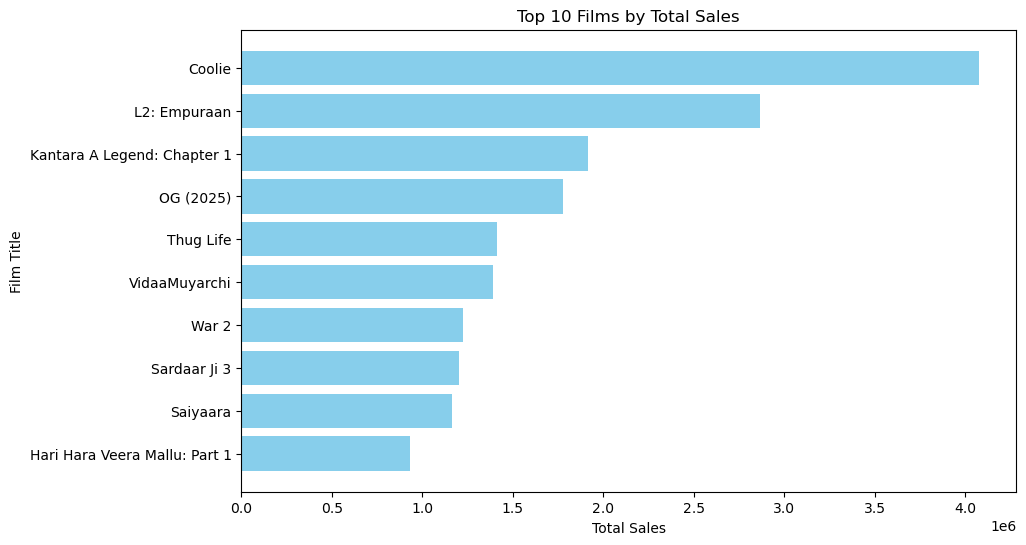

In [218]:
import matplotlib.pyplot as plt

top10 = sales_by_title.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10['title'], top10['sales'], color='skyblue')
plt.xlabel("Total Sales")
plt.ylabel("Film Title")
plt.title("Top 10 Films by Total Sales")
plt.gca().invert_yaxis()
plt.show()

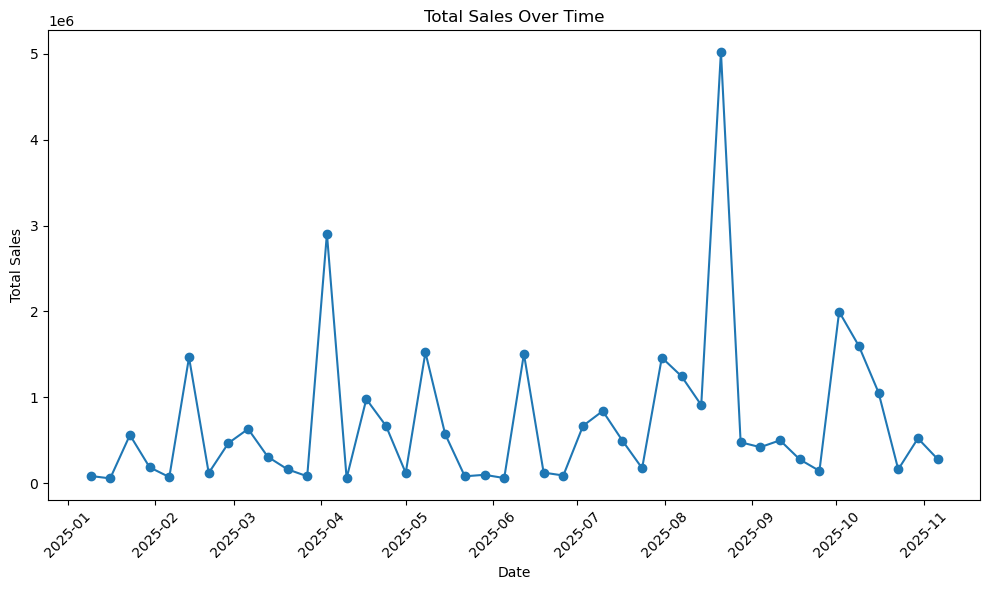

In [220]:
sales_over_time = merged_df.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(sales_over_time['date'], sales_over_time['sales'], marker='o')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Total Sales Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [222]:
print(merged_df.columns)

Index(['film_id', 'date', 'sales', 'title'], dtype='object')


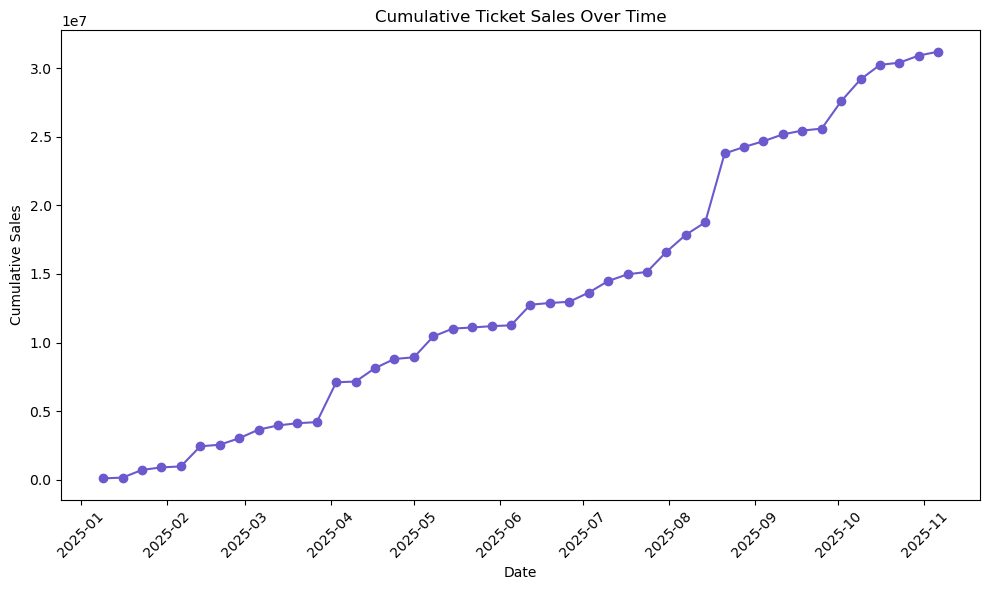

In [224]:
# Prepare data
sales_over_time = merged_df.groupby('date')['sales'].sum().sort_index()
cumulative_sales = sales_over_time.cumsum()

plt.figure(figsize=(10,6))
plt.plot(cumulative_sales.index, cumulative_sales.values, marker='o', color='slateblue')
plt.title("Cumulative Ticket Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()